In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 
import seaborn as sns

In [3]:
file = 'waterQuality.csv'


In [4]:
df = pd.read_csv(file)

In [5]:
new = df.replace('#NUM!', np.nan)


In [6]:
new

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999,0.08,7.94,0.08,0.68,0.060,0.19,0.06,0.76,1.05,0.00,...,0.185,14.12,2.26,0.003,0.49,0.57,0.05,0.05,0.07,0
5000,0.00,3.15,0.05,0.08,0.020,0.50,0.10,1.71,0.80,0.00,...,0.176,17.08,1.94,0.006,0.47,2.19,0.01,0.03,0.01,0
5001,0.04,0.19,0.07,0.33,0.030,0.13,0.04,1.68,0.76,0.00,...,0.163,5.45,1.83,0.002,0.10,0.81,0.03,0.01,0.08,0
5002,0.08,9.62,0.07,0.62,0.100,0.07,0.10,1.86,0.26,0.00,...,0.013,2.72,1.26,0.008,3.77,0.82,0.03,0.07,0.05,0


In [7]:
numeric_columns = df.select_dtypes(include='number')
numeric_columns.mean()

aluminium       0.244263
arsenic         0.140884
barium          1.283465
cadmium         0.049544
chloramine      1.323623
chromium        0.162030
copper          0.730588
flouride        0.772124
bacteria        0.335518
viruses         0.369403
lead            0.097864
nitrates        9.864055
nitrites        1.176147
mercury         0.005186
perchlorate    10.957128
radium          2.305987
selenium        0.049578
silver          0.104778
uranium         0.044720
dtype: float64

In [8]:
numeric_columns.median()

aluminium       0.060
arsenic         0.060
barium          0.870
cadmium         0.050
chloramine      0.210
chromium        0.070
copper          0.620
flouride        0.770
bacteria        0.260
viruses         0.009
lead            0.101
nitrates       10.070
nitrites        1.270
mercury         0.005
perchlorate     4.160
radium          1.545
selenium        0.050
silver          0.060
uranium         0.050
dtype: float64

In [9]:
numeric_columns.std()

aluminium       0.747579
arsenic         0.228174
barium          1.124192
cadmium         0.033363
chloramine      2.198522
chromium        0.226381
copper          0.659267
flouride        0.434524
bacteria        0.327720
viruses         0.380997
lead            0.058723
nitrates        5.532080
nitrites        0.626796
mercury         0.002963
perchlorate    15.130280
radium          2.110590
selenium        0.028879
silver          0.120230
uranium         0.026917
dtype: float64

In [10]:
numeric_columns.var()


aluminium        0.558875
arsenic          0.052063
barium           1.263807
cadmium          0.001113
chloramine       4.833498
chromium         0.051248
copper           0.434633
flouride         0.188811
bacteria         0.107400
viruses          0.145158
lead             0.003448
nitrates        30.603913
nitrites         0.392873
mercury          0.000009
perchlorate    228.925381
radium           4.454589
selenium         0.000834
silver           0.014455
uranium          0.000725
dtype: float64

In [11]:
def calculate_iqr_and_zscore(column):
 Q1 = column.quantile(0.25)
 Q3 = column.quantile(0.75)
 IQR = Q3 - Q1
 z_scores = stats.zscore(column.dropna())
 print("IQR = " , IQR  , "z_scores = " , z_scores)
 return IQR, z_scores

In [12]:
calculate_iqr_and_zscore(df['copper'])

IQR =  1.26 z_scores =  0      -0.850404
1      -0.107080
2      -1.077953
3       1.409907
4      -0.243609
          ...   
4999    0.044618
5000    1.485757
5001    1.440247
5002    1.713305
5003    0.803112
Name: copper, Length: 5004, dtype: float64


(1.26,
 0      -0.850404
 1      -0.107080
 2      -1.077953
 3       1.409907
 4      -0.243609
           ...   
 4999    0.044618
 5000    1.485757
 5001    1.440247
 5002    1.713305
 5003    0.803112
 Name: copper, Length: 5004, dtype: float64)

In [13]:
df['copper']

0       0.17
1       0.66
2       0.02
3       1.66
4       0.57
        ... 
4999    0.76
5000    1.71
5001    1.68
5002    1.86
5003    1.26
Name: copper, Length: 5004, dtype: float64

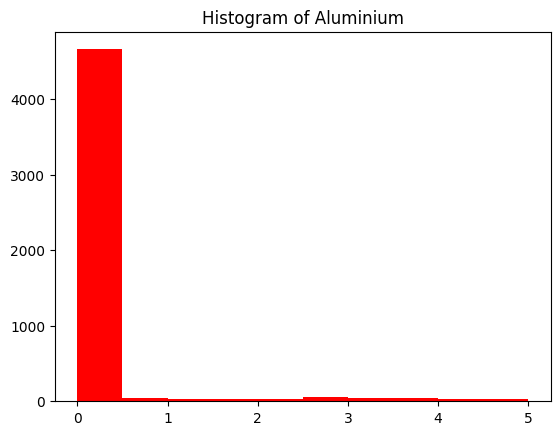

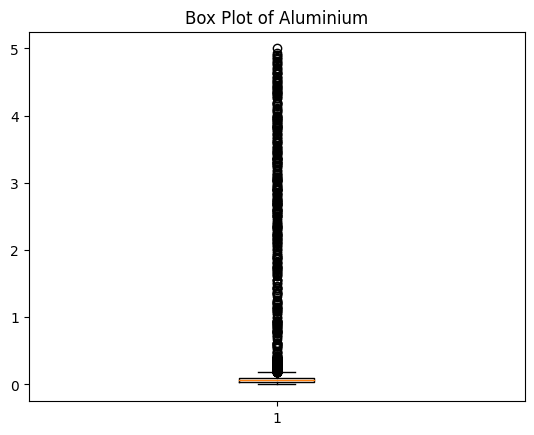

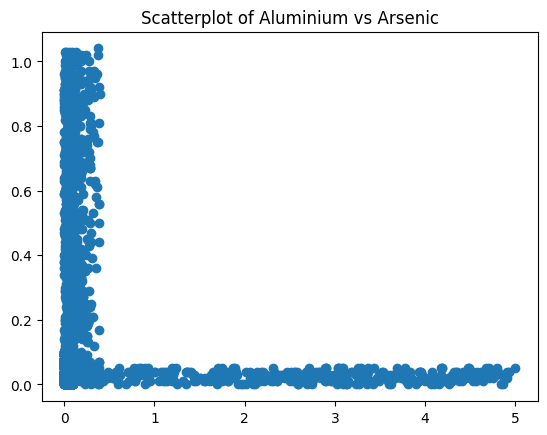

In [14]:
plt.hist(df['aluminium'],color='red')
plt.title('Histogram of Aluminium')
plt.show()
# Box plot example (for 'aluminium')
plt.boxplot(x=df['aluminium'])
plt.title('Box Plot of Aluminium')
plt.show()

plt.scatter(data=df, x='aluminium', y='arsenic')
plt.title('Scatterplot of Aluminium vs Arsenic')
plt.show()


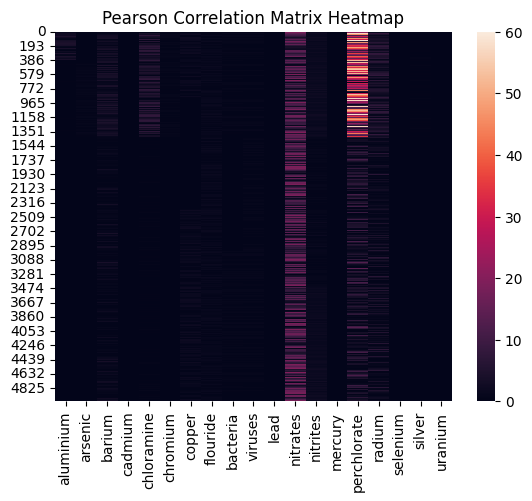

In [16]:
sns.heatmap(numeric_columns)
plt.title('Pearson Correlation Matrix Heatmap')
plt.show()